### Building Your Own Movie Database by Reading an API

1. Import urllib.request, urllib.parse, urllib.error, and json.
2. Load the secret API key (you have to get one from the OMDb website and use that; it has a daily limit of 1,000) from a JSON file stored in the same folder in a variable, by using json.loads.
3. Obtain a key and store it in JSON as APIkeys.json.
4. Open the APIkeys.json file.
5. Assign the OMDb portal (http://www.omdbapi.com/?) as a string to a variable.
6. Create a variable called apikey with the last portion of the URL (&apikey=secretapikey), where secretapikey is your own API key.
7. Write a utility function called print_json to print the movie data from a JSON file (which we will get from the portal).
8. Write a utility function to download a poster of the movie based on the information from the JSON dataset and save it in your local folder. Use the os module. The poster data is stored in the JSON key Poster. Use the Python command to open a file and write the poster data. Close the file after you're done. This function will save the poster data as an image file.
9. Write a utility function called search_movie to search for a movie by its name, print the downloaded JSON data, and save the movie poster in the local folder. Use a try-except loop for this. Use the previously created serviceurl and apikey variables. You have to pass on a dictionary with a key, t, and the movie name as the corresponding value to the urllib.parse.urlencode() function and then add the serviceurl and apikey to the output of the function to construct the full URL. This URL will be used to access the data. The JSON data has a key called Response. If it is True, that means the read was successful. Check this before processing the data. If it's not successful, then print the JSON key Error, which will contain the appropriate error message returned by the movie database.
10. Test the search_movie function by entering Titanic.
11. Test the search_movie function by entering "Random_error" (obviously, this will not be found, and you should be able to check whether your error catching code is working properly

In [32]:
# Import urllib.request, urllib.parse, urllib.error, and json.
import urllib.request, urllib.parse, urllib.error
import json

In [33]:
# APIkey is stored in 'APIkeys.json'.
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['Apikeys']

In [34]:
# Assigning OMDB portal and creating variable 'apikey' with last part of the URL
serviceurl = 'http://www.omdbapi.com/?'
apikey = '&apikey='+omdbapi

In [35]:
# Write a utility function print_json to print nicely the movie data from a JSON file

def print_json(json_data):
    list_keys=['Title', 'Year', 'Rated', 'Released', 'Runtime', 'Genre', 'Director', 'Writer', 
               'Actors', 'Plot', 'Language', 'Country', 'Awards', 'Ratings', 
               'Metascore', 'imdbRating', 'imdbVotes', 'imdbID']
    print("-"*50)
    for k in list_keys:
        if k in list(json_data.keys()):
            print(f"{k}: {json_data[k]}")
    print("-"*50)

In [36]:
# Write a utility function to download a poster of the movie based on the information from the json dataset and save in your local folder
def save_poster(json_data):
    import os
    title = json_data['Title']
    poster_url = json_data['Poster']
    # Splits the poster url by '.' and picks up the last string as file extension
    poster_file_extension=poster_url.split('.')[-1]
    # Reads the image file from web
    poster_data = urllib.request.urlopen(poster_url).read()
        
    savelocation=os.getcwd()+'\\'+'Posters'+'\\'
    # Creates new directory if the directory does not exist. Otherwise, just use the existing path.
    if not os.path.isdir(savelocation):
        os.mkdir(savelocation)
    
    filename=savelocation+str(title)+'.'+poster_file_extension
    f=open(filename,'wb')
    f.write(poster_data)
    f.close()

In [37]:
# Write a utility function search_movie to search a movie by its name, print the downloaded JSON data

def search_movie(title):
    try:
        url = serviceurl + urllib.parse.urlencode({'t': str(title)})+apikey
        print(f'Retrieving the data of "{title}" now... ')
        print(url)
        uh = urllib.request.urlopen(url)
        data = uh.read()
        json_data=json.loads(data)
        
        if json_data['Response']=='True':
            print_json(json_data)
            # Asks user whether to download the poster of the movie
            if json_data['Poster']!='N/A':
                save_poster(json_data)
        else:
            print("Error encountered: ",json_data['Error'])
    
    except urllib.error.URLError as e:
        print(f"ERROR: {e.reason}")

In [38]:
# Search movie name 'Titanic'
search_movie("Titanic")

Retrieving the data of "Titanic" now... 
http://www.omdbapi.com/?t=Titanic&apikey=818c1f82
--------------------------------------------------
Title: Titanic
Year: 1997
Rated: PG-13
Released: 19 Dec 1997
Runtime: 194 min
Genre: Drama, Romance
Director: James Cameron
Writer: James Cameron
Actors: Leonardo DiCaprio, Kate Winslet, Billy Zane
Plot: A seventeen-year-old aristocrat falls in love with a kind but poor artist aboard the luxurious, ill-fated R.M.S. Titanic.
Language: English, Swedish, Italian, French
Country: United States, Mexico
Awards: Won 11 Oscars. 126 wins & 83 nominations total
Ratings: [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '88%'}, {'Source': 'Metacritic', 'Value': '75/100'}]
Metascore: 75
imdbRating: 7.9
imdbVotes: 1,185,567
imdbID: tt0120338
--------------------------------------------------
ERROR: [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:997)


In [40]:
# Do a random search with invalid name
search_movie("Random_error")

Retrieving the data of "Random_error" now... 
http://www.omdbapi.com/?t=Random_error&apikey=818c1f82
Error encountered:  Movie not found!


### 4. Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code. You are free to use Matplotlib, Seaborn or another package if you prefer.
    a. Line
    b. Scatter
    c. Bar
    d. Histogram
    e. Density Plot
    f. Pie Chart

In [99]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [100]:
# Reading Candy hierarchy data from 2016
df2 = pd.read_excel("BOING-BOING-CANDY-HIERARCHY-2016-SURVEY-Responses.xlsx")

In [101]:
# Display First 5 rows from Candy 2016 dataframe
df2.head()

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).",[York Peppermint Patties] Ignore
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,3 or higher,2,3 or higher,3 or higher,3 or higher,3 or higher,Friday,South to North,Science: Latest News and Headlines,NaN
1,2016-10-24 05:09:54.798,No,Male,45,usa,il,MEH,MEH,JOY,JOY,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,Science: Latest News and Headlines,NaN
2,2016-10-24 05:13:06.734,No,Female,48,US,Colorado,JOY,DESPAIR,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,East to West,Science: Latest News and Headlines,NaN
3,2016-10-24 05:14:17.192,No,Male,57,usa,il,JOY,MEH,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,South to North,Science: Latest News and Headlines,NaN
4,2016-10-24 05:14:24.625,Yes,Male,42,USA,South Dakota,MEH,DESPAIR,JOY,DESPAIR,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,ESPN,NaN


In [102]:
# Creating new Dataframe with useful columns only.
df3 = df2[['Timestamp', 'Are you going actually going trick or treating yourself?','Your gender:','How old are you?','Which country do you live in?',' [100 Grand Bar]',' [Any full-sized candy bar]',' [Butterfinger]',' [Hershey’s Milk Chocolate]'," [Hershey's Kisses]",' [Peanut M&M’s]','Which day do you prefer, Friday or Sunday?']]


In [103]:
# Renaming column names to ease dataframe operations
df3.rename({'Your gender:':'Gender', 'Which country do you live in?':'Country', 'Are you going actually going trick or treating yourself?':'Going_out_trick_or_treat?'}, axis=1 , inplace=True)

df3.head()

/var/folders/nk/8ps965dj20n03wtv5g7vnnlr0000gn/T/ipykernel_63359/4234044392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename({'Your gender:':'Gender', 'Which country do you live in?':'Country', 'Are you going actually going trick or treating yourself?':'Going_out_trick_or_treat?'}, axis=1 , inplace=True)


,Timestamp,Going_out_trick_or_treat?,Gender,How old are you?,Country,[100 Grand Bar],[Any full-sized candy bar],[Butterfinger],[Hershey’s Milk Chocolate],[Hershey's Kisses],[Peanut M&M’s],"Which day do you prefer, Friday or Sunday?"
0,2016-10-24 05:09:23.033,No,Male,22,Canada,JOY,JOY,JOY,JOY,JOY,JOY,Friday
1,2016-10-24 05:09:54.798,No,Male,45,usa,MEH,JOY,JOY,MEH,MEH,JOY,Friday
2,2016-10-24 05:13:06.734,No,Female,48,US,JOY,JOY,JOY,JOY,JOY,JOY,Sunday
3,2016-10-24 05:14:17.192,No,Male,57,usa,JOY,JOY,JOY,JOY,JOY,JOY,Sunday
4,2016-10-24 05:14:24.625,Yes,Male,42,USA,MEH,JOY,JOY,JOY,JOY,MEH,Friday


In [104]:
# Fill in missing data
df3['Gender'] =  df3['Gender'].fillna('Other')

/var/folders/nk/8ps965dj20n03wtv5g7vnnlr0000gn/T/ipykernel_63359/2400983133.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Gender'] =  df3['Gender'].fillna('Other')


In [105]:

# Replacing "I'd rather not say" with 'Other'
df4 = df3.replace("I'd rather not say","Other")
df4.head()

,Timestamp,Going_out_trick_or_treat?,Gender,How old are you?,Country,[100 Grand Bar],[Any full-sized candy bar],[Butterfinger],[Hershey’s Milk Chocolate],[Hershey's Kisses],[Peanut M&M’s],"Which day do you prefer, Friday or Sunday?"
0,2016-10-24 05:09:23.033,No,Male,22,Canada,JOY,JOY,JOY,JOY,JOY,JOY,Friday
1,2016-10-24 05:09:54.798,No,Male,45,usa,MEH,JOY,JOY,MEH,MEH,JOY,Friday
2,2016-10-24 05:13:06.734,No,Female,48,US,JOY,JOY,JOY,JOY,JOY,JOY,Sunday
3,2016-10-24 05:14:17.192,No,Male,57,usa,JOY,JOY,JOY,JOY,JOY,JOY,Sunday
4,2016-10-24 05:14:24.625,Yes,Male,42,USA,MEH,JOY,JOY,JOY,JOY,MEH,Friday


In [107]:
# Creating a dataframe with only Gender column
df4_x = df4[['Gender']]

# Creating a dataframe with only Going_out_trick_or_treat? column
df4_y = df4[['Going_out_trick_or_treat?']]

In [108]:
# Replacing string with numbers in Gender dataframe for plotting
plot_x = df4_x.replace("Male",1).replace("Female",2).replace("Other",3)

In [109]:
# Replacing string with numbers in Going_out_trick_or_treat? dataframe for plotting
plot_y = df4_y.replace("Yes",1).replace("No",2)

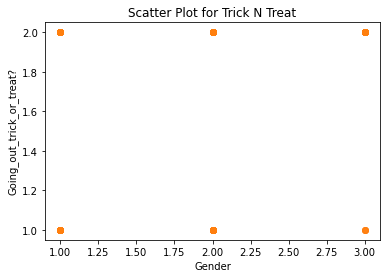

In [110]:

# Scatter plot
plt.scatter(plot_x, plot_y, color ='tab:orange', alpha=0.5)
    
  
plt.title('Scatter Plot for Trick N Treat') 
plt.xlabel("Gender")
plt.ylabel("Going_out_trick_or_treat?")
    
# display the plot 
plt.show()

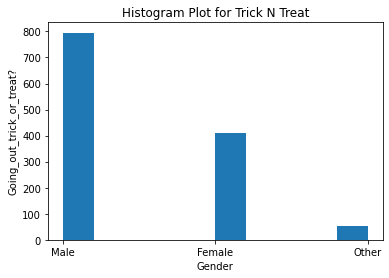

In [115]:
# Histogram Plots
plt.hist(df4_x)

plt.title('Histogram Plot for Trick N Treat') 
plt.xlabel("Gender")
plt.ylabel("Going_out_trick_or_treat?")

plt.show()

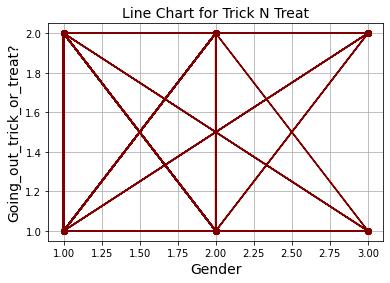

In [114]:
# Line Chart 
plt.plot(plot_x, plot_y, color='maroon', marker='o')
plt.title('Line Chart for Trick N Treat', fontsize=14)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Going_out_trick_or_treat?', fontsize=14)
plt.grid(True)
plt.show()